## This is some of the data that we created by ourself with the help of the VADERE Software

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from matplotlib.pyplot import cm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [ ]:
!unzip drive/MyDrive/VADERE_Data.zip

Archive:  drive/MyDrive/VADERE_Data.zip
replace corridor both directions.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: corridor both directions.txt  
  inflating: left turn.txt           
  inflating: supermarket.txt         


We have created three different scenarios:
1.Corridor Scenario /  2.Left Turn  / 3.Supermarket

In [ ]:
columns = ["Time Stamp", "ID", "X", "Y"]
corridor = pd.read_csv("corridor both directions.txt", sep=" ", header=None)
left_turn = pd.read_csv("left turn.txt", sep=" ", header=None)
supermarket = pd.read_csv("supermarket.txt", sep=" ", header=None)
corridor = corridor.iloc[1:]
left_turn = left_turn.iloc[1:]
supermarket = supermarket.iloc[1:]



corridor.columns = columns
left_turn.columns = columns
supermarket.columns = columns

In [ ]:
corridor.head()

,Time Stamp,ID,X,Y
1,1,1,17.701,0.7010000000000001
2,1,2,18.103,0.7010000000000001
3,1,3,18.505,0.7010000000000001
4,1,4,17.701,1.1030000000000002
5,1,5,18.103,1.1030000000000002


In [ ]:
left_turn.head()

,Time Stamp,ID,X,Y
1,1,1,0.7010000000000001,0.7010000000000001
2,1,2,1.1030000000000002,0.7010000000000001
3,1,3,1.5050000000000001,0.7010000000000001
4,1,4,1.907,0.7010000000000001
5,1,5,2.309,0.7010000000000001


In [ ]:
supermarket.head()

,Time Stamp,ID,X,Y
1,1,1,47.901,12.101
2,1,2,48.303000000000004,12.101
3,1,3,48.705000000000005,12.101
4,1,4,49.107000000000006,12.101
5,1,5,47.901,12.503


### Now let us observe closely the **Corridor Scenario** data

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


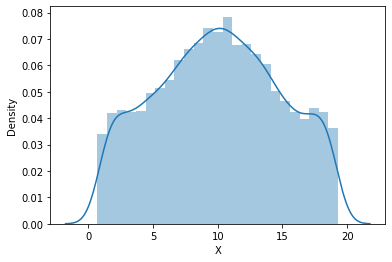

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


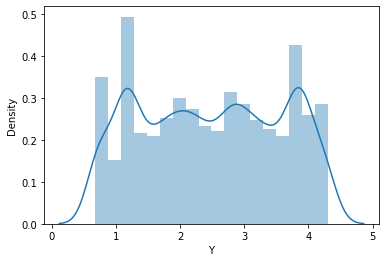

Number of data points:  6936


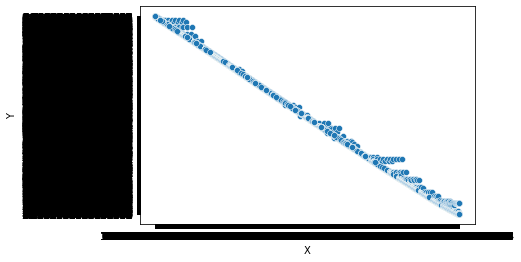

In [ ]:

# Distribution of the data
sns.distplot(corridor['X'])
plt.show()
sns.distplot(corridor['Y'])
plt.show()

# Number of data points
print("Number of data points: ", corridor.shape[0])

# Presence of non-linear relationships
sns.scatterplot(x='X', y='Y', data=corridor)
plt.show()

In [ ]:
corridor.describe()

,Time Stamp,ID,X,Y
count,6936,6936,6936,6936
unique,108,100,6472,6248
top,26,21,1.903,1.7052568064425038
freq,100,108,22,25


In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler


In [ ]:



corridor['Time Stamp'] = corridor['Time Stamp'].astype(float)

# Calculate the time difference
corridor['Time Delta'] = corridor['Time Stamp'] - corridor['Time Stamp'].shift(1)
corridor['Time Delta'].fillna(1, inplace=True)
corridor.dropna(inplace=True)

# Calculate the distance
corridor['distance'] = np.sqrt((corridor['X'].astype(float) - corridor['X'].astype(float).shift(1))**2 + (corridor['Y'].astype(float) - corridor['Y'].astype(float).shift(1))**2)
corridor['distance'].fillna(corridor['distance'].mean(), inplace=True)

# Calculate the speed
corridor['speed'] = corridor['distance'] / (corridor['Time Delta'] + 1e-6)

X = corridor[['Time Stamp', 'ID', 'X', 'Y']]
y = corridor['speed']

scaler_X = StandardScaler()

# Fit the scaler on X
scaler_X.fit(X)

# Transform X
X = scaler_X.transform(X)

# Initialize the scaler for y
scaler_y = StandardScaler()

# Fit the scaler on y
scaler_y.fit(y.values.reshape(-1, 1))

# Transform y
y = scaler_y.transform(y.values.reshape(-1, 1))





In [ ]:
"""

# Prepare the features and target variable
# Calculate the time difference in seconds
# Convert the Time Stamp column to a numerical data type
corridor['Time Stamp'] = corridor['Time Stamp'].astype(float)

# Calculate the time difference
corridor['Time Delta'] = corridor['Time Stamp'] - corridor['Time Stamp'].shift(1)
corridor['Time Delta'].fillna(1, inplace=True)
corridor.dropna(inplace=True)

# Calculate the distance
corridor['distance'] = np.sqrt((corridor['X'].astype(float) - corridor['X'].astype(float).shift(1))**2 + (corridor['Y'].astype(float) - corridor['Y'].astype(float).shift(1))**2)
corridor['distance'].fillna(corridor['distance'].mean(), inplace=True)

# Calculate the speed
corridor['speed'] = corridor['distance'] / (corridor['Time Delta'] + 1e-6)

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
corridor = normalizer.fit_transform(corridor)
X = corridor[['Time Stamp', 'ID', 'X', 'Y']]
y = corridor['speed']

print('DEBUGGING')
print(np.sum(np.isnan(corridor['distance'])), np.sum(np.isinf(corridor['distance'])), np.sum((corridor['distance'] > 1e10)))
print('-------------------------------')
"""

# Define the number of folds
n_folds = 5

# Initialize the KFold object
kf = KFold(n_folds)

# Initialize a list to store the test scores
scores = []
mses = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train a linear regression model
    reg = LinearRegression().fit(X_train, y_train)
    
    # Evaluate the model on the testing data
    test_score = reg.score(X_test, y_test)
    scores.append(test_score)
    
    # Predict on the test set
    y_pred = reg.predict(X_test)
    
    
    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)
print(mses)
print(scores)
# Calculate the average test score, prediction error, and mean squared error
avg_score = np.mean(scores)
avg_mse = np.mean(mses)

print("Average Test Score: ", avg_score)
print("Average Mean Squared Error: ", avg_mse)

[1.3612403558155377, 0.5729838718327085, 0.6954615588918968, 1.032017834032958, 1.3640407192266122]
[0.022114371535260857, 0.02884883454157683, -0.052777887106228105, -0.05504094672685622, -0.05790314881429892]
Average Test Score:  -0.02295175531410911
Average Mean Squared Error:  1.0051488679599427


# Now we implement a neural network just like the NN from the paper


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from sklearn.utils import resample
import tensorflow as tf
from sklearn.model_selection import KFold, train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


# Load the data
X = corridor[['Time Stamp', 'ID', 'X', 'Y']]
y = corridor['speed']

scaler_X = StandardScaler()

# Fit the scaler on X
scaler_X.fit(X)

# Transform X
X = scaler_X.transform(X)

# Initialize the scaler for y
scaler_y = StandardScaler()

# Fit the scaler on y
scaler_y.fit(y.values.reshape(-1, 1))

# Transform y
y = scaler_y.transform(y.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

"""
# Initialize the normalizers
X_scaler = StandardScaler()
y_scaler = StandardScaler()

# Fit the normalizers on the training data
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))

# Transform the testing data
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test.reshape(-1, 1))
"""

# Initialize a list to store the training, validation, and testing losses
training_losses = []
validation_losses = []
testing_losses = []

# Define the number of folds for the cross validation
n_folds = 5

# Initialize the KFold object for cross validation
kf = KFold(n_folds)

# Define the number of subsamples for the bootstrapping
n_subsamples = 50

# Loop over the subsamples
for i in range(n_subsamples):
    # Bootstrap the training data
    X_train_sub, y_train_sub = resample(X_train, y_train, random_state=i)
    
    # Loop over the folds for cross validation
    for train_index, val_index in kf.split(X_train_sub):
        X_train_cv, X_val = X_train_sub[train_index], X_train_sub[val_index]
        y_train_cv, y_val = y_train_sub[train_index], y_train_sub[val_index]
        
        # Build the model
        model = Sequential()
        model.add(Dense(32, activation='relu', input_shape=(X_train_cv.shape[1],)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Add Early stopping in case the model overfits
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0)
        
        # Train the model on the training data
        history = model.fit(X_train_cv, y_train_cv, epochs=100, verbose=1,validation_data=(X_val, y_val), callbacks=[early_stopping])
    
        # Evaluate the model on the validation data
        val_loss = model.evaluate(X_val, y_val, verbose=1)
        validation_losses.append(val_loss)
        
        # Evaluate the model on the testing data
        test_loss = model.evaluate(X_test, y_test, verbose=0)
        testing_losses.append(test_loss)
#Calculate the mean and standard deviation of the training loss

mean_training_loss = np.mean(history.history['loss'])
std_training_loss = np.std(history.history['loss'])
training_losses.append((mean_training_loss, std_training_loss))

#Calculate the mean and standard deviation of the validation losses

mean_validation_loss = np.mean(validation_losses)
std_validation_loss = np.std(validation_losses)

#Calculate the mean and standard deviation of the testing losses

mean_testing_loss = np.mean(testing_losses)
std_testing_loss = np.std(testing_losses)

#Print the results

print("Mean training loss: {:.4f} +/- {:.4f}".format(mean_training_loss, std_training_loss))
print("Mean validation loss: {:.4f} +/- {:.4f}".format(mean_validation_loss, std_validation_loss))
print("Mean testing loss: {:.4f} +/- {:.4f}".format(mean_testing_loss, std_testing_loss))


Streaming output truncated to the last 5000 lines.
Epoch 10/100
87/87 [==============================] - 0s 3ms/step - loss: 0.8176 - val_loss: 0.8994
Epoch 11/100
87/87 [==============================] - 0s 3ms/step - loss: 0.8100 - val_loss: 0.9010
Epoch 12/100
87/87 [==============================] - 0s 3ms/step - loss: 0.8049 - val_loss: 0.8923
Epoch 13/100
87/87 [==============================] - 0s 4ms/step - loss: 0.7999 - val_loss: 0.8860
Epoch 14/100
87/87 [==============================] - 0s 3ms/step - loss: 0.7972 - val_loss: 0.8858
Epoch 15/100
87/87 [==============================] - 0s 3ms/step - loss: 0.7908 - val_loss: 0.8776
Epoch 16/100
87/87 [==============================] - 0s 3ms/step - loss: 0.7865 - val_loss: 0.8782
Epoch 17/100
87/87 [==============================] - 0s 3ms/step - loss: 0.7847 - val_loss: 0.8656
Epoch 18/100
87/87 [==============================] - 0s 4ms/step - loss: 0.7811 - val_loss: 0.8743
Epoch 19/100
87/87 [=============================

## Now let us observe closely the Left Turn Scenario data

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


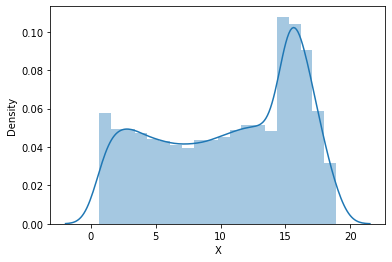

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


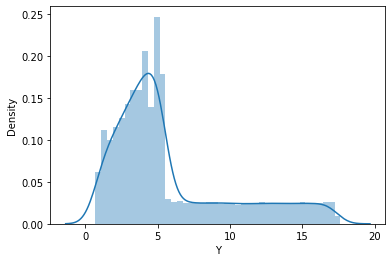

Number of data points:  8897


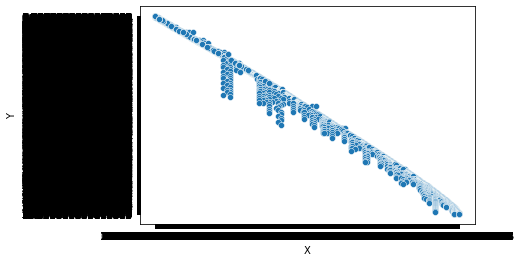

In [ ]:
# Distribution of the data
sns.distplot(left_turn['X'])
plt.show()
sns.distplot(left_turn['Y'])
plt.show()

# Number of data points
print("Number of data points: ", left_turn.shape[0])

# Presence of non-linear relationships
sns.scatterplot(x='X', y='Y', data=left_turn)
plt.show()